# ベイズ勉強会 Part 2 ベルヌーイ分布のベイズ推論
> ベルヌーイ分布のベイズ推論を実践する

- toc: true 
- badges: false
- comments: true
- categories: [bayes]
- image: images/dag1.png

ベイズ勉強会資料は『ベイズ推論による機械学習入門』{% fn 1 %}を元に、途中式計算をできるだけ省略せずに行ったものです。

# ベルヌーイ分布

ベルヌーイ分布は次の確率質量関数で表される確率分布である。

この確率質量関数は確率$\mu$で1、$1-\mu$で0を出力する。

> Important: ベルヌーイ分布の確率質量関数$$Bern(x|\mu) = \mu^x (1-\mu)^{1-x}　(x \in \{0, 1\}, \mu \in (0, 1))$$

## 問題

今N個のデータ点$\mathcal{D} = \{x_1, x_2, \dots, x_N\}　(x_1, \dots, x_N \in \{0, 1\})$が得られたとする。未知のデータ点$x_*$を予測するためにベイズ推測を行いたい。

この問題が解ければ、コインを投げた時表が出る確率はどの程度かをベイズ推測で評価できるようになる。

## モデル構築

$\mathcal{D}, x_*, \mu$で同時分布を構築する。データ点のとりうる値が2値なので、$\mathcal{D}, x_*$が$\mu$をパラメータに持つベルヌーイ分布から生成されているとする。$\mathcal{D}, x_*, \mu$の関係をDAGで描くと以下のようになる。

![](dags/dag_bern1.png)

よって同時分布は

$$
p(\mathcal{D}, x_*, \mu) = p(\mathcal{D}|\mu)p(x_*|\mu)p(\mu)
$$

という尤度関数×事前分布の形で書ける。

### 尤度関数

データ点はベルヌーイ分布から独立に生成されるとしているので

$$
p(\mathcal{D}|\mu) = \Pi_{n=1}^{N} Bern(x_n|\mu) \\
p(x_*|\mu) = Bern(x_*|\mu)
$$
と書ける。

### 事前分布

事前分布$p(\mu)$は$\mu \in (0,1)$を満たすような確率分布である必要がある。これを満たす確率分布に、ベータ分布がある。

> Important: ベータ分布の確率密度関数

> $$Beta(\mu|a, b) = C_B(a,b) \mu^{a-1} (1-\mu)^{b-1}$$
> $$ただし, C_B (a,b) = \frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)}, \mu \in (0, 1), \{a, b\} \in \mathbb{R^+}を満たす.$$

$a, b$がベータ分布のパラメータである。

> Note: ベータ分布の係数とガンマ関数

> $C_B(a,b)$は正規化されることを保証する係数である。$C_B(a,b)$中の$\Gamma(・)$はガンマ関数である。ガンマ関数は自然数に定義される階乗を一般化したものであり、正の実数$x \in \mathbb{R^+}$に対して、
>
> $$\Gamma(x) = \int t^{x-1} e^{-t} dt$$
>
> と定義される。重要な性質として
>
> $$\begin{eqnarray} \Gamma(x+1) &=& x\Gamma(x) \\ \Gamma(1) &=& 1 \end{eqnarray}$$
>
> を満たし、自然数nに対しては
>
>$$\Gamma(n+1) = n!$$
>
> が成り立つ。

ベータ分布を用いることで事前分布$p(\mu)$は

$$
p(\mu) = Beta(\mu|a, b)
$$

と定義できる。$a,b$も加えてDAGを描き直すと次のように描ける。

![](dags/dag_bern2.png)

更に$a,b$を出力する確率分布を考えることもできるが、モデルを複雑化すると計算も煩雑になるのでここまでにしておく。では$a,b$の値はどうするのかというと、事前に決めておくことになる。このような変数を、パラメータのためのパラメータということで、超パラメータ(ハイパーパラメータ)と呼ぶ。

### まとめ

まとめると、推論のためのモデルは次のように書ける。

$$
\begin{eqnarray}
    p(\mathcal{D}, x_*, \mu) &=& p(\mathcal{D}|\mu)p(x_*|\mu)p(\mu) \\
    p(\mathcal{D}|\mu) &=& \Pi_{n=1}^{N} Bern(x_n|\mu) \\
    p(x_*|\mu) &=& Bern(x_*|\mu) \\
    p(\mu) &=& Beta(\mu|a,b)
\end{eqnarray}
$$

## 事後分布の推論

実際に$\mathcal{D}$を観測した後の事後分布$p(\mu|\mathcal{D})$を求める。

> Note: モデルの事後分布は$p(x_*, \mu|\mathcal{D}) = p(x_*|\mu)p(\mu|\mathcal{D})$だがデータからの学習に関わるのは$p(\mu|\mathcal{D})$の部分のみ。学習のみに推論を絞ってこちらを事後分布と呼ぶ場合も多い。本節でも$p(\mu|\mathcal{D})$を事後分布と呼ぶ。

ベイズの定理を用いて、

$$
\begin{eqnarray}
    p(\mu|\mathcal{D}) &=& \frac{p(\mathcal{D}|\mu)p(\mu)}{p(\mathcal{D})} \\
    &=& \frac{\{\Pi_{n=1}^{N}p(x_n|\mu)\}p(\mu)}{p(\mathcal{D})} \\
    &\propto& \{\Pi_{n=1}^{N}p(x_n|\mu)\}p(\mu)
\end{eqnarray}
$$

である。分母は正規化されていることを保証する項であり、分布形状を決めるのは分子の部分であるため3行目では省略している。ベルヌーイ分布もベータ分布も指数部分があり、対数をとると計算が楽になる。

$$
\begin{eqnarray}
    \ln p(\mu|\mathcal{D}) &=& \Sigma_{n=1}^{N} \ln p(x_n|\mu) + \ln p(\mu) + const.　(対数化により分母は定数項に) \\
    &=& \Sigma_{n=1}^{N} \ln(\mu^{x_n} (1-\mu)^{1-x_n}) + ln(C_B(a,b) \mu^{a-1} (1-\mu)^{b-1}) + const.　(ベルヌーイ分布, ベータ分布の式を代入) \\
    &=& \Sigma_{n=1}^{N} x_n \ln \mu + \Sigma_{n=1}^{N} (1-x_n) \ln (1-\mu) + (a-1)\ln \mu + (b-1) \ln (1-\mu) + const.　(C_B(a,b)は対数化によりconst.に吸収) \\
    &=& (\Sigma_{n=1}^{N} x_n + a - 1)\ln \mu + (N - \Sigma_{n=1}^{N} x_n + b - 1) \ln (1-\mu) + const.
\end{eqnarray}
$$

対数を元に戻すと

$$
p(\mu|\mathcal{D}) \propto \mu^{(\Sigma_{n=1}^{N} x_n + a - 1)} (1-\mu)^{N - \Sigma_{n=1}^{N} x_n + b - 1}
$$

でありこれはベータ分布の形である。なお定数項は正規化されることを保証する係数となっている。つまり

$$
\begin{eqnarray}
    p(\mu|\mathcal{D}) &=& Beta(\mu|\hat{a}, \hat{b}) \\
    ただし　\hat{a} &=& \Sigma_{n=1}^{N} x_n + a \\
    \hat{b} &=& N - \Sigma_{n=1}^{N} x_n + b
\end{eqnarray}
$$

となる。

> Note: このように、特定の確率分布のパラメータの事前分布とすることで、事後分布が事前分布と同じ形になる確率分布を共役事前分布という。ベルヌーイ分布の共役事前分布はベータ分布である。

> Note: ベルヌーイ分布の場合は、成功確率パラメータである$\mu$をベータ分布で幅を持たせて推定できることがベイズ推論の意義となる。

> Note: $N$はデータ点の個数、$\Sigma_{n=1}^{N} x_n$は値が1だったデータ点の個数である。ハイパーパラメータ$a,b$をデータの情報で更新しているという見方ができる。また、$N$が大きくなると、$a,b$が無視できる、すなわちハイパーパラメータが結果に影響しなくなることがわかる。

## 予測分布の算出

未知のデータ点$x_*$の予測分布$p(x_*|\mathcal{D})$は$p(x_*, \mu|\mathcal{D}) = p(x_*|\mu)p(\mu|\mathcal{D})$をパラメータ$\mu$について周辺化することで求まる。

$$
\begin{eqnarray}
    p(x_*|\mathcal{D}) &=& \int p(x_*|\mu)p(\mu|\mathcal{D}) d\mu \\
    &=& \int Bern(x_*|\mu) Beta(\mu|\hat{a}, \hat{b}) d\mu \\
    &=& C_B(\hat{a},\hat{b}) \int \mu^{x_*} (1-\mu)^{1-x_*} \mu^{\hat{a}-1}(1-\mu)^{\hat{b}-1}d\mu \\
    &=& C_B(\hat{a},\hat{b}) \int \mu^{x_* + \hat{a} -1}(1-\mu)^{1-x_*+\hat{b}-1}d\mu
\end{eqnarray}
$$

ここでベータ分布の定義式から

$$
\int \mu^{x_* + \hat{a} -1}(1-\mu)^{1-x_*+\hat{b}-1}d\mu = \frac{1}{C_B(x_* + \hat{a}, 1-x_* + \hat{b})}
$$

となる。

> Note: ベータ分布は確率分布なので積分した時1になる。つまり係数$C_B$以外の部分を積分した時の値は係数$C_B$の逆数である。$\int \mu^{x_* + \hat{a} -1}(1-\mu)^{1-x_*+\hat{b}-1}d\mu$はベータ分布の積分から係数$C_B$の部分を除いた形になっている。

したがって、

$$
\begin{eqnarray}
    p(x_*|\mathcal{D}) &=& \frac{C_B(\hat{a},\hat{b})}{C_B(x_* + \hat{a}, 1-x_* + \hat{b})} \\
    &=& \frac{\Gamma(\hat{a}+\hat{b})\Gamma(x_* + \hat{a})\Gamma(1-x_* + \hat{b})}{\Gamma(\hat{a})\Gamma(\hat{b})\Gamma(\hat{a}+\hat{b}+1)}
\end{eqnarray}
$$

複雑な式になっているが$x_*$は0か1しかとり得ないことを利用するともっと単純に書ける。

$$
\begin{eqnarray}
    p(x_* = 1|\mathcal{D}) &=& \frac{\Gamma(\hat{a}+\hat{b})\Gamma(1 + \hat{a})\Gamma(\hat{b})}{\Gamma(\hat{a})\Gamma(\hat{b})\Gamma(\hat{a}+\hat{b}+1)} \\
    &=& \frac{\Gamma(\hat{a}+\hat{b}) \hat{a}\Gamma(\hat{a})\Gamma(\hat{b})}{\Gamma(\hat{a})\Gamma(\hat{b})(\hat{a}+\hat{b})\Gamma(\hat{a}+\hat{b})} \\
    &=& \frac{\hat{a}}{\hat{a}+\hat{b}} \\
    p(x_* = 0|\mathcal{D}) &=& \frac{\Gamma(\hat{a}+\hat{b})\Gamma(\hat{a})\Gamma(1 + \hat{b})}{\Gamma(\hat{a})\Gamma(\hat{b})\Gamma(\hat{a}+\hat{b}+1)} \\
    &=& \frac{\hat{b}}{\hat{a}+\hat{b}}
\end{eqnarray}
$$

より

$$
\begin{eqnarray}
    p(x_*|\mathcal{D}) &=& (\frac{\hat{a}}{\hat{a}+\hat{b}})^{x_*} (\frac{\hat{b}}{\hat{a}+\hat{b}})^{1-x_*} \\
    &=& (\frac{\hat{a}}{\hat{a}+\hat{b}})^{x_*} (1-\frac{\hat{a}}{\hat{a}+\hat{b}})^{1-x_*} \\
    &=& Bern(x_*|\frac{\hat{a}}{\hat{a}+\hat{b}}) \\
    &=& Bern(x_*|\frac{\Sigma_{n=1}^{N}x_n + a}{N+a+b})
\end{eqnarray}
$$

と予測分布はベルヌーイ分布の形で書ける。

> Note: 予測分布についても、$N$が大きくなると、$a,b$が無視できる、すなわちハイパーパラメータが結果に影響しなくなることがわかる。また予測分布の形状が尤度関数と変わっておらず、$\mu$の点推定を行った場合の予測と結局同じことをやっているように見える(特にNが大きければ最尤推定と同じである)が、尤度関数の種類によっては予測分布の形と異なる場合がある。ポアソン分布→負の二項分布、精度未知の1次元ガウス分布→Studentのt分布などの例がある。また、事後分布として$\mu$の分布が得られていて、幅のある推定ができている。

# Juliaによる実装

[Turing.jlのTutorial](https://turing.ml/v0.8.3/tutorials/0-introduction/)より。

## 素朴に

In [5]:
# パッケージのimport

# 乱数生成のためのパッケージ
using Random

# グラフ描画用のパッケージ
using Plots

# 確率分布の関数を呼び出すパッケージ
using Distributions

In [2]:
# 真の成功確率を0.5と置く
p_true = 0.5

# 0~100までの数列
Ns = 0:100;

In [6]:
# 100回ベルヌーイ試行を行う
Random.seed!(12)
data = rand(Bernoulli(p_true), last(Ns))

# 最初の5回
data[1:5]

5-element Array{Bool,1}:
 1
 0
 1
 1
 0

In [7]:
# 事前分布をベータ分布で置く。ハイパーパラメータはa=1,b=1とする
prior_belief = Beta(1, 1);

In [12]:
#hide_output
# アニメーションをつけるためにStatsPlotsパッケージをimport
using StatsPlots

# ベイズ推論の進行過程をアニメーションに
animation = @gif for (i, N) in enumerate(Ns)

    # 表がでた回数(heads)と裏が出た回数(tails)を計算
    heads = sum(data[1:i-1])
    tails = N - heads
    
    # 事後確率分布
    updated_belief = Beta(prior_belief.α + heads, prior_belief.β + tails)

    # 描画用の関数
    plot(updated_belief, 
        size = (500, 250), 
        title = "Updated belief after $N observations",
        xlabel = "probability of heads", 
        ylabel = "", 
        legend = nothing,
        xlim = (0,1),
        fill=0, α=0.3, w=3)
    vline!([p_true])
end;

┌ Info: Saved animation to 
│   fn = /Users/tomoyamiyagi/Projects/tpt-medical-it/_notebooks/tmp.gif
└ @ Plots /Users/tomoyamiyagi/.julia/packages/Plots/NVH6y/src/animation.jl:102


![](animations/bernoulli.gif)

## Turing.jlを使ったハミルトニアン・モンテカルロによる近似計算

In [15]:
# パッケージのimport

# Load Turing and MCMCChains.
using Turing, MCMCChains

# Load the distributions library.
using Distributions

# Load StatsPlots for density plots.
using StatsPlots

In [16]:
# モデル設定
@model coinflip(y) = begin
    
    # 事前分布
    p ~ Beta(1, 1)
    
    # 試行回数N
    N = length(y)
    for n in 1:N
        # 各試行の結果はベルヌーイ分布で決定する
        y[n] ~ Bernoulli(p)
    end
end;

In [23]:
# HMCの設定
iterations = 1000
ϵ = 0.05
τ = 10

# HMCの実行
chain = sample(coinflip(data), HMC(ϵ, τ), iterations, progress=false);

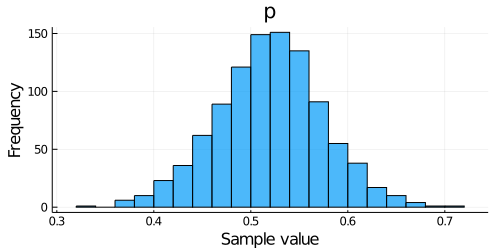

In [18]:
# 結果のサマリ
p_summary = chain[:p]
plot(p_summary, seriestype = :histogram)

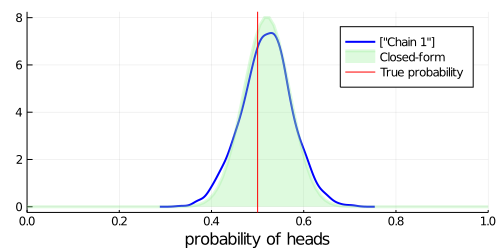

In [24]:
# 解析的に解いた事後分布
N = length(data)
heads = sum(data)
updated_belief = Beta(prior_belief.α + heads, prior_belief.β + N - heads)

# HMCによる事後分布の近似を青で描画
p = plot(p_summary, seriestype = :density, xlim = (0,1), legend = :best, w = 2, c = :blue)

# 解析的に解いた事後分布を緑で描画
plot!(p, range(0, stop = 1, length = 100), pdf.(Ref(updated_belief), range(0, stop = 1, length = 100)), 
        xlabel = "probability of heads", ylabel = "", title = "", xlim = (0,1), label = "Closed-form",
        fill=0, α=0.3, w=3, c = :lightgreen)

# 真の成功確率を赤で描画
vline!(p, [p_true], label = "True probability", c = :red)

{{ '[須山敦志. ベイズ推論による機械学習入門. 講談社, 2017](https://www.kspub.co.jp/book/detail/1538320.html)' | fndetail: 1 }}